In [1]:
# Artificial Neural Networks with Keras

In [2]:
import tensorflow as tf

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
# Building an Image Classifier


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.0.0'

In [ ]:
#loading the fashion MNIST dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [ ]:
#training set into a validation set

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
#plot an image 

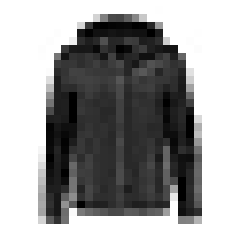

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
# The labels 0 to 9

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[1]]

'T-shirt/top'

In [15]:
class_names[y_train[9]]

'Coat'

In [ ]:
# the validation and test number of picture 

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [ ]:
#Sample of the images in the dataset

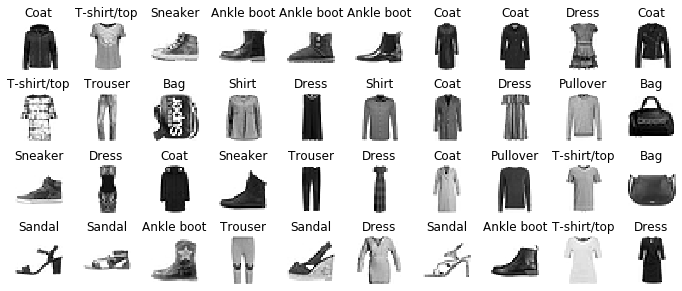

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
## Construct a Model

In [19]:
model_00 = keras.models.Sequential()
model_00.add(keras.layers.Flatten(input_shape=[28, 28]))
model_00.add(keras.layers.Dense(300, activation="relu"))
model_00.add(keras.layers.Dense(100, activation="relu"))
model_00.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
keras.backend.clear_session()
np.random.seed(42)

In [21]:
model_00.layers

In [22]:
model_00.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# get  type of 3-Layer

In [23]:
hidden1 = model_00.layers[1]
hidden1.name

'dense'

In [24]:
hidden1 = model_00.layers[2]
hidden1.name

'dense_1'

In [25]:
hidden1 = model_00.layers[3]
hidden1.name

'dense_2'

In [26]:
model_00.get_layer(hidden1.name) is hidden1

True

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[-1.11286432e-01, -9.05240178e-02, -2.07144558e-01,
        -1.54849470e-01, -6.54459745e-02, -1.29010081e-01,
         6.23378158e-03, -2.02569559e-01, -9.26211923e-02,
         7.41626918e-02],
       [-1.64602846e-01,  2.27990180e-01,  2.31678694e-01,
        -5.52186370e-02, -1.80944338e-01, -1.02362409e-01,
        -2.27955148e-01,  6.12101257e-02, -8.24798793e-02,
        -1.81075752e-01],
       [ 2.00722396e-01, -4.05620337e-02, -8.11026841e-02,
        -1.09382145e-01, -1.22185238e-01, -6.10442460e-03,
         1.80258453e-01,  1.43360049e-01,  2.08551943e-01,
        -9.32983905e-02],
       [ 1.90883249e-01, -3.88279557e-03,  1.28179133e-01,
        -1.94449127e-02,  1.21947408e-01, -1.33516982e-01,
        -1.45843491e-01, -2.30886221e-01, -8.39455575e-02,
        -1.13777116e-01],
       [ 4.90692258e-03,  2.02203989e-02, -1.00821003e-01,
        -1.12949118e-01, -1.87833443e-01, -8.33960772e-02,
        -9.11124051e-02,  1.48541033e-02,  5.66078722e-02,
        -3.

In [29]:
weights.shape

(100, 10)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
biases.shape

(10,)

In [ ]:
# Compile the Model


In [32]:
model_00.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
# Train the model


In [33]:
history = model_00.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 192us/sample - loss: 0.7270 - accuracy: 0.7594 - val_loss: 0.5118 - val_accuracy: 0.8268
Epoch 2/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4899 - accuracy: 0.8297 - val_loss: 0.4444 - val_accuracy: 0.8448
Epoch 3/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.4462 - accuracy: 0.8441 - val_loss: 0.4279 - val_accuracy: 0.8518
Epoch 4/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4185 - accuracy: 0.8524 - val_loss: 0.4036 - val_accuracy: 0.8590
Epoch 5/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3988 - accuracy: 0.8589 - val_loss: 0.3877 - val_accuracy: 0.8688
Epoch 6/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3836 - accuracy: 0.8653 - val_loss: 0.3750 - val_accuracy: 0.8696
Epoch 7/30
55000/55000 [==========================

In [34]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [35]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Plot learning Curves

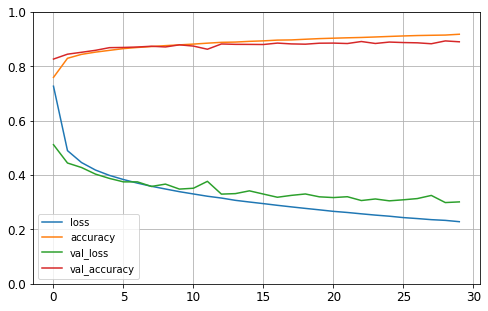

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
model_00.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3308185912847519, 0.8827]

In [41]:
X_new = X_test[:3]
y_proba = model_00.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = model_00.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

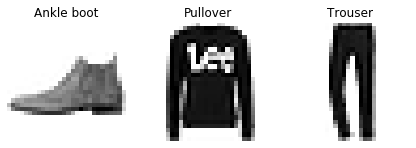

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# Exercise

In [ ]:
# 1) Plot Learning curves when using different optimizers like "Adam"

In [46]:
model_00.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [47]:
history = model_00.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 160us/sample - loss: 0.3790 - accuracy: 0.8629 - val_loss: 0.3626 - val_accuracy: 0.8620
Epoch 2/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.3299 - accuracy: 0.8794 - val_loss: 0.3366 - val_accuracy: 0.8784
Epoch 3/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.3069 - accuracy: 0.8868 - val_loss: 0.3166 - val_accuracy: 0.8846
Epoch 4/30
55000/55000 [==============================] - 8s 137us/sample - loss: 0.2904 - accuracy: 0.8915 - val_loss: 0.3224 - val_accuracy: 0.8808
Epoch 5/30
55000/55000 [==============================] - 8s 137us/sample - loss: 0.2764 - accuracy: 0.8958 - val_loss: 0.3072 - val_accuracy: 0.8880
Epoch 6/30
55000/55000 [==============================] - 7s 129us/sample - loss: 0.2601 - accuracy: 0.9021 - val_loss: 0.3041 - val_accuracy: 0.8930
Epoch 7/30
55000/55000 [===========================

In [48]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [49]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#Plot learning Curves with optimizer Adam!!

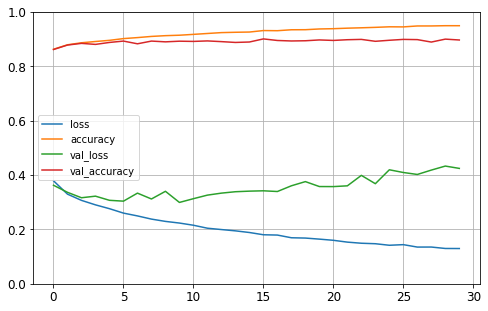

In [51]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
model_00.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4442233137130737, 0.8883]

In [53]:
X_new = X_test[:3]
y_proba = model_00.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [54]:
y_pred = model_00.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [55]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [56]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

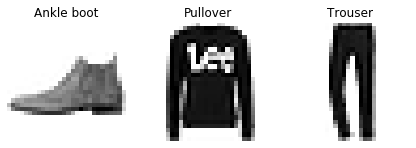

In [57]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#  2) Plot Learning curves when using different batch size 
#  using   optimizer of Adam  with  different batch size for 100 and 50


In [60]:
history = model_00.fit(X_train, y_train, batch_size=100, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.0222 - accuracy: 0.9919 - val_loss: 0.9142 - val_accuracy: 0.9012
Epoch 2/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.9378 - val_accuracy: 0.9008
Epoch 3/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.0178 - accuracy: 0.9935 - val_loss: 0.9536 - val_accuracy: 0.9004
Epoch 4/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.0182 - accuracy: 0.9938 - val_loss: 1.0373 - val_accuracy: 0.9006
Epoch 5/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.0205 - accuracy: 0.9923 - val_loss: 0.9756 - val_accuracy: 0.8974
Epoch 6/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.0255 - accuracy: 0.9898 - val_loss: 1.0280 - val_accuracy: 0.8988
Epoch 7/30
55000/55000 [==============================] -

In [61]:
history.params

{'batch_size': 100,
 'epochs': 30,
 'steps': 550,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

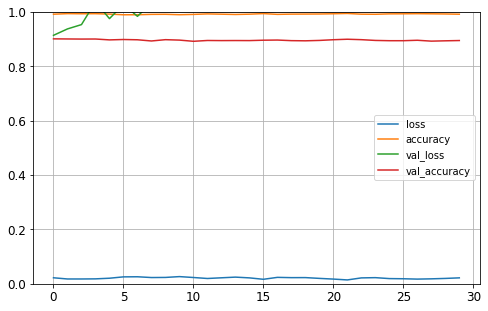

In [62]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
model_00.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.2293111360522686, 0.8939]

In [65]:
X_new = X_test[:3]
y_proba = model_00.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
y_pred = model_00.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [67]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [68]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

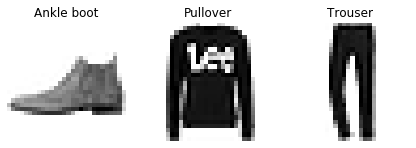

In [69]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [71]:
history = model_00.fit(X_train, y_train, batch_size=50, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.0561 - accuracy: 0.9827 - val_loss: 1.1917 - val_accuracy: 0.8946
Epoch 2/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.0277 - accuracy: 0.9903 - val_loss: 1.1753 - val_accuracy: 0.8924
Epoch 3/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.0370 - accuracy: 0.9876 - val_loss: 1.1722 - val_accuracy: 0.8926
Epoch 4/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.0306 - accuracy: 0.9888 - val_loss: 1.2811 - val_accuracy: 0.8946
Epoch 5/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.0272 - accuracy: 0.9897 - val_loss: 1.2691 - val_accuracy: 0.8964
Epoch 6/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.0343 - accuracy: 0.9879 - val_loss: 1.2311 - val_accuracy: 0.8894
Epoch 7/30
55000/55000 [==============================

In [72]:
history.params

{'batch_size': 50,
 'epochs': 30,
 'steps': 1100,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

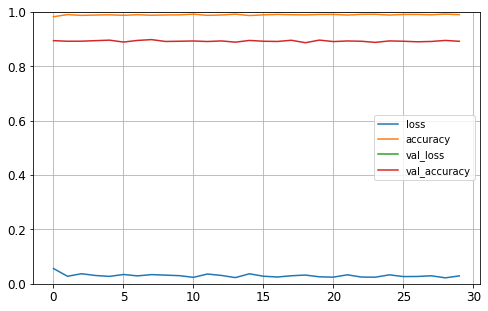

In [73]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [74]:
model_00.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.400831927445531, 0.8896]

In [ ]:
#In general: Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster.

#In general, the models improve with more epochs of training, to a point. They'll start to plateau in accuracy as they converge.

In [ ]:
#3) Plot Learning curves when using different number of epochs
# batch_size= 32 and epochs = 60 with optimizer= Adam

In [75]:
history = model_00.fit(X_train, y_train, batch_size=32, epochs=60,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/60
55000/55000 [==============================] - 9s 155us/sample - loss: 0.0599 - accuracy: 0.9821 - val_loss: 1.2361 - val_accuracy: 0.8998
Epoch 2/60
55000/55000 [==============================] - 9s 162us/sample - loss: 0.0380 - accuracy: 0.9872 - val_loss: 1.3251 - val_accuracy: 0.8898
Epoch 3/60
55000/55000 [==============================] - 7s 136us/sample - loss: 0.0418 - accuracy: 0.9859 - val_loss: 1.3341 - val_accuracy: 0.8920
Epoch 4/60
55000/55000 [==============================] - 7s 129us/sample - loss: 0.0385 - accuracy: 0.9866 - val_loss: 1.2786 - val_accuracy: 0.8850
Epoch 5/60
55000/55000 [==============================] - 7s 135us/sample - loss: 0.0410 - accuracy: 0.9864 - val_loss: 1.3019 - val_accuracy: 0.8922
Epoch 6/60
55000/55000 [==============================] - 7s 133us/sample - loss: 0.0358 - accuracy: 0.9877 - val_loss: 1.3056 - val_accuracy: 0.8940
Epoch 7/60
55000/55000 [===========================

Epoch 55/60
55000/55000 [==============================] - 8s 149us/sample - loss: 0.0353 - accuracy: 0.9891 - val_loss: 1.5475 - val_accuracy: 0.8912
Epoch 56/60
55000/55000 [==============================] - 9s 156us/sample - loss: 0.0265 - accuracy: 0.9913 - val_loss: 1.4403 - val_accuracy: 0.8962
Epoch 57/60
55000/55000 [==============================] - 8s 148us/sample - loss: 0.0379 - accuracy: 0.9878 - val_loss: 1.5207 - val_accuracy: 0.8934
Epoch 58/60
55000/55000 [==============================] - 8s 152us/sample - loss: 0.0245 - accuracy: 0.9919 - val_loss: 1.5942 - val_accuracy: 0.8904
Epoch 59/60
55000/55000 [==============================] - 9s 163us/sample - loss: 0.0301 - accuracy: 0.9904 - val_loss: 1.5097 - val_accuracy: 0.8922
Epoch 60/60
55000/55000 [==============================] - 8s 154us/sample - loss: 0.0313 - accuracy: 0.9898 - val_loss: 1.4795 - val_accuracy: 0.8948


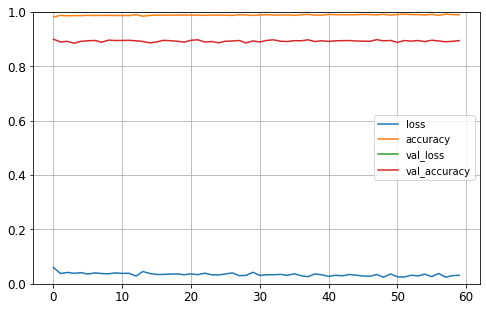

In [76]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [77]:
model_00.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5580486432723701, 0.8911]

In [ ]:
# 4)  with more layers


In [82]:
model_02 = keras.models.Sequential()
model_02.add(keras.layers.Flatten(input_shape=[28, 28]))
model_02.add(keras.layers.Dense(600, activation="relu"))
model_02.add(keras.layers.Dense(400, activation="relu"))
model_02.add(keras.layers.Dense(10, activation="softmax"))

In [83]:
model_02.layers

In [84]:
model_02.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 600)               471000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               240400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 715,410
Trainable params: 715,410
Non-trainable params: 0
_________________________________________________________________


In [85]:
hidden1 = model_02.layers[1]
hidden1.name

'dense'

In [86]:
model_02.get_layer(hidden1.name) is hidden1

True

In [87]:
weights, biases = hidden1.get_weights()

In [89]:
weights.shape

(784, 600)

In [90]:
biases.shape

(600,)

In [92]:
model_02.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [93]:
history = model_02.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 18s 320us/sample - loss: 0.6839 - accuracy: 0.7780 - val_loss: 0.5197 - val_accuracy: 0.8182
Epoch 2/30
55000/55000 [==============================] - 17s 301us/sample - loss: 0.4750 - accuracy: 0.8352 - val_loss: 0.4591 - val_accuracy: 0.8442
Epoch 3/30
55000/55000 [==============================] - 16s 296us/sample - loss: 0.4310 - accuracy: 0.8491 - val_loss: 0.4101 - val_accuracy: 0.8588
Epoch 4/30
55000/55000 [==============================] - 16s 287us/sample - loss: 0.4033 - accuracy: 0.8581 - val_loss: 0.3959 - val_accuracy: 0.8638
Epoch 5/30
55000/55000 [==============================] - 17s 301us/sample - loss: 0.3845 - accuracy: 0.8643 - val_loss: 0.3770 - val_accuracy: 0.8700
Epoch 6/30
55000/55000 [==============================] - 16s 295us/sample - loss: 0.3687 - accuracy: 0.8688 - val_loss: 0.3637 - val_accuracy: 0.8750
Epoch 7/30
55000/55000 [=====================

In [94]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

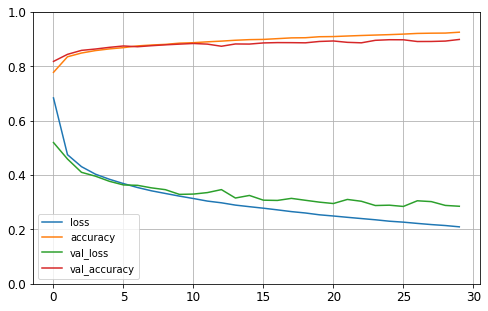

In [95]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [96]:
model_02.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.31888515908718107, 0.8886]

In [98]:
X_new = X_test[:3]
y_proba = model_02.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [99]:
y_pred = model_02.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [100]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [101]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

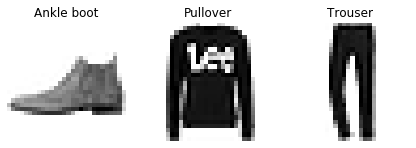

In [102]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()